In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import numpy as np

ADAS Audio 

In [2]:
ADAS_path="D:/Audio_classifier/Data/BEEP_6/time_stretch_0.6003_Beep_6.wav"
Data,sr=librosa.load(ADAS_path)
print(Data)
print(sr)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1653191e-04
 -7.6414166e-05 -1.2045439e-05]
22050


In [3]:
Audio(ADAS_path)

In [4]:
stft=librosa.stft(Data)

In [5]:
spectrogram_db=librosa.amplitude_to_db(abs(stft))

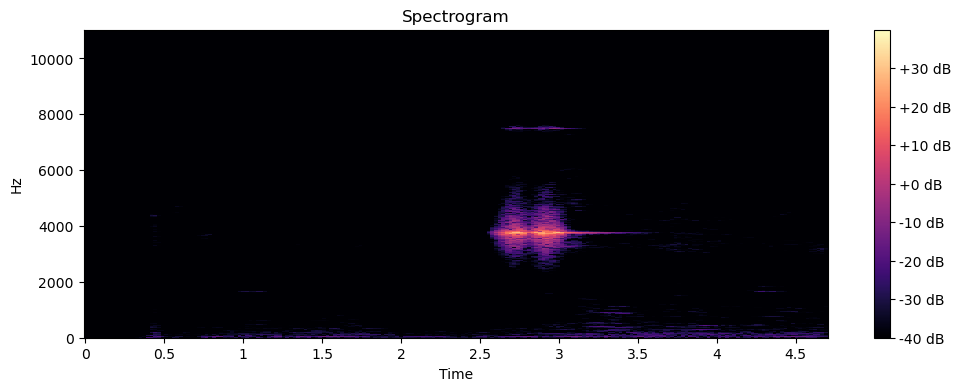

In [6]:
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram_db,sr=sr,x_axis= 'time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

Other than ADAS audio

In [7]:
Not_ADAS_path="D:\\Audio_classifier\\UrbanSound8K\\audio\\fold2\\14780-9-0-1.wav"
DataNA,SR=librosa.load(Not_ADAS_path)
print(DataNA)
print(SR)

[-0.13191155  0.02203283  0.18679194 ... -0.08500439 -0.10159009
 -0.15459202]
22050


In [53]:
Audio(Not_ADAS_path)



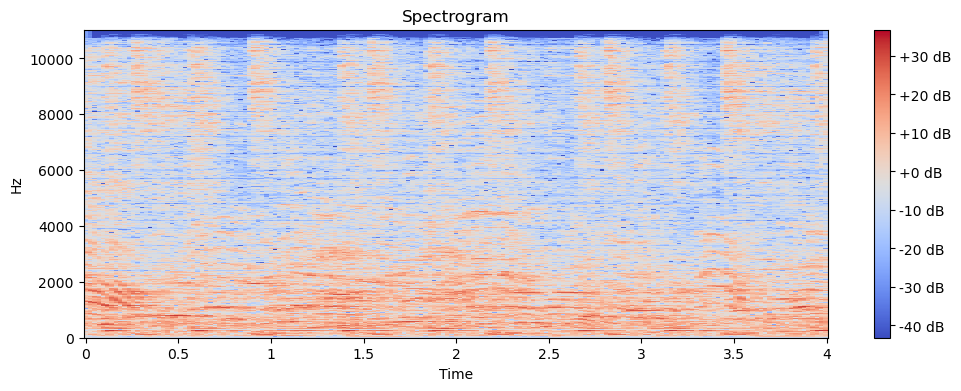

In [9]:
spectrogram_db=librosa.amplitude_to_db(abs(stft))
stft=librosa.stft(DataNA)

spectrogram_db=librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram_db,sr=sr,x_axis= 'time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [10]:
metadata=pd.read_csv("FULL_DATA_2_Tasks.csv")
metadata.head()

,file_name,Audio Class,ADAS Class,fold
0,100032-3-0-0.wav,Not ADAS,-1,5
1,100263-2-0-117.wav,Not ADAS,-1,5
2,100263-2-0-121.wav,Not ADAS,-1,5
3,100263-2-0-126.wav,Not ADAS,-1,5
4,100263-2-0-137.wav,Not ADAS,-1,5


In [11]:
mfcc=librosa.feature.mfcc(y=Data,sr=sr,n_mfcc=40)
mfcc

array([[-6.8055200e+02, -6.8055200e+02, -6.8055200e+02, ...,
        -6.3003583e+02, -6.3253979e+02, -6.4918317e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.3425262e+01,  4.1940865e+01,  3.1238670e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.1921185e+01,  2.0214611e+01,  2.0335209e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.9522934e+00,  5.9591098e+00,  5.1344328e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.6153116e+00,  5.6019087e+00,  5.5008259e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.0231438e+00, -7.0455688e-01, -5.1450205e-01]], dtype=float32)

In [12]:
import os
Directory_ADAS="D:/Audio_classifier/Data/ALL_AUDIO"
Directory_NOT_ADAS="D:/Audio_classifier/UrbanSound8K/audio"

In [14]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [15]:
Extracted_features=[]
for index,row in metadata.iterrows():
    file_name=row["file_name"]
    if row["fold"]>0:
        path_finder=os.path.join(Directory_NOT_ADAS,'fold'+str(row["fold"])+'/',str(row["file_name"]))
        
    else:
        path_finder=os.path.join(Directory_ADAS,file_name)
    path_finder=path_finder.replace('\\','/')
    print(path_finder)
    ADAS_class=row['ADAS Class']
    AUDIO_class=row['Audio Class']
    MFCC_Data=features_extractor(path_finder)
    Extracted_features.append([MFCC_Data,AUDIO_class,ADAS_class])


D:/Audio_classifier/UrbanSound8K/audio/fold5/100032-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-117.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-121.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-126.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-137.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-143.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-161.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/100263-2-0-36.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/100648-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/100648-1-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/100648-1-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/100648-1-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/100648-1-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/100652-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/100652-

D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-28.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-29.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/102857-5-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/10

D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-35.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-40.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-41.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-45.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-48.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-51.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-52.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-53.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-55.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-57.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-0-66.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-1-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/104625-4-1-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/104817-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/104817-4-0-1.

D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-1-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-1-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/105289-8-2-7.wav
D:/Audio

D:/Audio_classifier/UrbanSound8K/audio/fold5/108357-9-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/108357-9-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/108357-9-0-44.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/108357-9-0-49.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-29.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/108362-2-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/108638-9-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/108638-9-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/108638-9-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/108638-9-0-4.wa

D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-28.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113202-5-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/113203-5-0-0.wav


D:/Audio_classifier/UrbanSound8K/audio/fold7/116485-3-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/116485-3-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/116485-3-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/116485-3-2-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117048-3-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117048-3-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117048-3-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117048-3-0-35.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117072-3-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117072-3-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117072-3-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/117072-3-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/117181-8-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/117181-8-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/117181-8-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/117181-8-0-11.wav

D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121286-0-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/121299-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/121528-8-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/121528-8-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/121888-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/122199-3-1-1.wav
D:/Au

D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-3-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-3-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-3-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-3-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/125678-7-4-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/125791-3-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/125791-3-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/125791-3-0-15.wav
D:/Au

D:/Audio_classifier/UrbanSound8K/audio/fold7/130961-4-5-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/130961-4-5-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/130961-4-5-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/130961-4-5-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/130961-4-5-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/131199-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/131428-9-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/131428-9-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/131428-9-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/131428-9-1-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/131428-9-1-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/131428-9-1-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/131571-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/131918-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/131918-7-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/131918-7-0-2.wav
D:/Audi

D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-28.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/134717-0-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/135160-8-0-0.wav

D:/Audio_classifier/UrbanSound8K/audio/fold9/137803-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137803-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137803-3-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/137815-4-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/137969-2-0-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/137969-2-0-20.wav
D:/Au

D:/Audio_classifier/UrbanSound8K/audio/fold2/143970-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/143970-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/143970-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/144007-5-0-2.wa

D:/Audio_classifier/UrbanSound8K/audio/fold8/145612-6-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/145612-6-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/145683-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/145683-6-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/145683-6-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/145683-6-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/145683-6-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/145683-6-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/146186-5-0-3.wav
D:/A

D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-6-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-7-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-8-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/14772-7-9-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/147764-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/147764-4-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/147764-4-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/147764-4-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/147764-4-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/147764-4-4-1.wav
D:/Audio_classifie

D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-1-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-3-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/151005-4-3-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/151065-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/151069-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/151071-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/151149-2-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/151149-2-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/151149-2-0-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/151149-2-0-22.wav
D:/A

D:/Audio_classifier/UrbanSound8K/audio/fold2/155219-2-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/155219-2-0-51.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/155219-2-0-57.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/155227-9-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/155227-9-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/155227-9-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/155227-9-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/155227-9-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/155227-9-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/155234-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/155238-2-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/155238-2-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/155238-2-0-31.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/155238-2-0-36.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/155238-2-0-47.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/155238-2-0-67.

D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-2-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-2-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-2-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/156634-5-2-5.wav
D:/Audi

D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/157868-8-0-7.wa

D:/Audio_classifier/UrbanSound8K/audio/fold10/159742-8-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/159742-8-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/159742-8-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/159742-8-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/159743-8-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/159744-8-0-6.wav


D:/Audio_classifier/UrbanSound8K/audio/fold3/159761-0-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/159761-0-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-31.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-47.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/160009-2-0-50.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/160010-2-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/160010-2-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/160010-2-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/160010-2-0-32.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/160010-2-0-33.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/160010-2-0-37.

D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-15-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-15-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-16-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-16-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-17-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-17-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-17-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-17-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-17-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-6-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/162134-7-7-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/

D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-10-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-11-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-12-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-12-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-13-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-14-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-15-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-15-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-16-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-17-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-17-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/165039-7-4-1.w

D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-2-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-2-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-2-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-2-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-2-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-3-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-3-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-4-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/166931-4-4-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/166942-0-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/166942-0-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/166942-0-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/166942-0-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/166942-0-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/166942-0-0-13.wav
D:

D:/Audio_classifier/UrbanSound8K/audio/fold3/169044-2-0-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/169044-2-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/169044-2-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/169044-2-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/169044-2-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/169045-2-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/169098-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/169098-7-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/169098-7-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/169098-7-0-3.wav
D:

D:/Audio_classifier/UrbanSound8K/audio/fold4/171305-7-9-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/171388-9-0-202.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/171388-9-0-225.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/171388-9-0-246.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/171388-9-0-253.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/171388-9-0-43.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/171388-9-0-88.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/171406-9-0-124.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/171406-9-0-183.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/171406-9-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/171406-9-0-57.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/171406-9-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/171406-9-0-90.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/171464-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/171464-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/171464-3

C:\Users\CR53449\AppData\Local\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


D:/Audio_classifier/UrbanSound8K/audio/fold4/173994-3-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/173994-3-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/173994-3-0-44.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/173994-3-0-45.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/173995-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/173995-3-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/173995-3-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/173995-3-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174026-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174026-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174026-3-1-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174026-3-2-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174032-2-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174032-2-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174032-2-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/174032-2-0-18.wav


D:/Audio_classifier/UrbanSound8K/audio/fold5/175849-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/175850-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/175851-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/175852-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/175853-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/175854-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175855-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/175856-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/175856-1-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/175856-1-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175904-2-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175904-2-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175904-2-0-124.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175904-2-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175904-2-0-41.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/175904-2-0-64.wav


D:/Audio_classifier/UrbanSound8K/audio/fold7/177537-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/177537-7-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/177592-5-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/177620-3-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/177620-3-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/177620-3-0-25.wav
D:/A

D:/Audio_classifier/UrbanSound8K/audio/fold5/178099-9-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/17810-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/17810-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/178115-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/178118-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/178118-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/178118-3-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/178260-7-1-6.wav
D:/Audio_

D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-28.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/178826-2-0-39.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/179039-9-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/179039-9-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/179039-9-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/179039-9-0-38.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/179039-9-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/179039-9-0-40.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/179096-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/1790

D:/Audio_classifier/UrbanSound8K/audio/fold8/180132-4-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180132-4-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-1-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-1-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-1-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/180134-4-2-4.wav
D:

D:/Audio_classifier/UrbanSound8K/audio/fold7/181102-9-0-117.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/181102-9-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/181102-9-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/181102-9-0-50.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/181102-9-0-97.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-10-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-6-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-7-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-4-8-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/181624-

D:/Audio_classifier/UrbanSound8K/audio/fold4/185709-0-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/185709-0-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/185709-0-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/185800-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/185800-4-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/185800-4-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/185800-4-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/185800-4-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/185800-4-2-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/185801-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/185801-4-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/185801-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/18581-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/18581-3-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/18581-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/18581-3-1-3.wav
D:/Audio_cla

D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-2-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-2-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/188823-7-6-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-10-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-11-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-12-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/188824-7-3-0.wav
D:/Au

D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/190894-2-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/190996-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/190996-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/190996-3-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/191382-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/191382-3-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/191382-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/191382-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/191431-9-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/191431-9-0-30.wav
D:/Aud

D:/Audio_classifier/UrbanSound8K/audio/fold2/194841-9-0-48.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/194910-9-0-108.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/194910-9-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/194910-9-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/194910-9-0-63.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/194910-9-0-65.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/19496-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/19496-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/19496-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/194962-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/194962-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/194962-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/19503-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/19503-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/19503-3-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/195063-4-0-0.wav
D:/Audi

D:/Audio_classifier/UrbanSound8K/audio/fold6/197075-3-4-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/197075-3-6-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/197075-3-7-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/197080-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/197080-3-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/197080-3-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/197080-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/197243-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/197243-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-10-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-11-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-12-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/197318-6-3-0.wav
D:/Au

D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/201988-5-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/202334-9-0-105.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/202334-9-0-106.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/202334-9-0-137

D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-8-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/203929-7-9-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/203956-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/203962-5-0-0.wav


D:/Audio_classifier/UrbanSound8K/audio/fold8/207214-2-0-54.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/207214-2-0-62.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/207214-2-0-63.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/207214-2-0-68.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-112.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-119.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-128.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-130.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-137.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-43.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207216-2-0-66.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/207369-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207962-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207962-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/207962-3

D:/Audio_classifier/UrbanSound8K/audio/fold9/22882-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/22882-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-10-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-100-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-11-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-110-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-17-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-17-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-17-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-18-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-19-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-21-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-23-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-24-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/22883-7-27-0.wav
D:/Audio_

D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-39.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-40.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-41.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-42.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-43.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-44.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-45.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-46.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-47.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-48.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-49.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-50.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-51.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/24347-8-0-52.wav
D:/Audio_c

D:/Audio_classifier/UrbanSound8K/audio/fold7/27217-3-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/27349-3-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/27349-3-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/27349-3-1-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/27349-3-2-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/28284-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/28284-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/28284-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-32.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-33.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-44.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-46.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-57.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-65.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/28385-9-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/28426-8-0-0.wav
D:/Audio_classifie

D:/Audio_classifier/UrbanSound8K/audio/fold8/31325-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/31325-3-3-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/31325-3-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/31840-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/31840-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-1-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/31884-7-1-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/31973-9-0-43.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/31973-9-0-51.wav
D:/Audio_classifier/Ur

D:/Audio_classifier/UrbanSound8K/audio/fold4/35549-9-0-47.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35549-9-0-51.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35549-9-0-58.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/35628-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35629-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35629-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35629-3-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35629-3-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/35799-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/35800-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/36263-9-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/36263-9-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/36263-9-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/36263-9-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/36263-9-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/36263-9-0-5.wav
D:/Audio_classifi

D:/Audio_classifier/UrbanSound8K/audio/fold2/39970-9-0-46.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/39970-9-0-54.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/39970-9-0-98.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/40717-8-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/40722-8-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/40722-8-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/40722-8-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/40722-8-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/40722-8-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/40722-8-0-5.wav
D:/Audio_classifier/U

D:/Audio_classifier/UrbanSound8K/audio/fold1/46656-6-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46656-6-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46656-6-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46656-6-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/46668-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/46668-4-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/46668-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-26.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-31.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/46669-4-0-32.wav
D:/Audio_classifie

D:/Audio_classifier/UrbanSound8K/audio/fold2/50898-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/50901-0-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/50901-0-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/50901-0-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/51022-3-13-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/51022-3-29-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/51022-3-30-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/51022-3-7-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/51024-3-0-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/51024-3-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/51024-3-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/51024-3-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/51027-3-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/51027-3-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/51027-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/51027-3-1-4.wav
D:/Audio_classi

D:/Audio_classifier/UrbanSound8K/audio/fold9/54976-4-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/55013-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/55013-3-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/55013-3-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/55013-3-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-102.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-106.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-110.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-116.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-121.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-145.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-146.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-148.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-162.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-194.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/55018-0-0-2.wav
D:/A

D:/Audio_classifier/UrbanSound8K/audio/fold3/58857-2-0-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/58857-2-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/58857-2-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/58857-2-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-2-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-2-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-2-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/58937-4-3-6.wav
D:/Audio_classifier

D:/Audio_classifier/UrbanSound8K/audio/fold6/62564-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/62564-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/62564-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/62564-5-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/62564-5-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/62566-5-2-0.wav
D:/Audio_classifier/Urba

D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/63724-0-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/63932-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/63932-3-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/63932-3-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold4/63932-3-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/64346-6-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/6508-9-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/6508-9-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/6508-9-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/6508-9-0-4.wav
D:/Audio_classifier/UrbanSou

D:/Audio_classifier/UrbanSound8K/audio/fold10/69661-3-0-29.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/69777-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/69777-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold9/69777-3-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/6984-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/6988-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/6988-5-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/6988-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/6988-5-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/6988-5-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/6988-5-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/69883-3-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/69883-3-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/69883-3-0-9.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/69962-2-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/69962-2-0-15.wav
D:/Audio_classifier/UrbanS

D:/Audio_classifier/UrbanSound8K/audio/fold8/72221-3-4-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold5/72259-1-10-2.wav
D:/Audio_cl

D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-32.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-52.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-54.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-6.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-63.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-73.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-74.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-8.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-92.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-98.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/73524-0-0-99.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/73623-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/73623-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/73623-7-1-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/73623-7-2-0.wav
D:/

D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-105.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-116.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-130.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-134.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-135.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-28.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-35.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-36.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-38.wav
D:/Audio_classifier/UrbanSound8K/audio/fold8/74677-0-0-47.wav
D:/Au

D:/Audio_classifier/UrbanSound8K/audio/fold8/76085-4-0-97.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-24.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-29.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-32.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-36.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/76086-4-0-38.wav
D:/Audio_c

D:/Audio_classifier/UrbanSound8K/audio/fold3/78326-9-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-12.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-16.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-18.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-19.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/78360-4-0-23.wav
D:/Audio_cla

D:/Audio_classifier/UrbanSound8K/audio/fold6/82368-2-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/82368-2-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/82368-2-0-23.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/82368-2-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/82368-2-0-30.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/82368-2-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/82811-3-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/82811-3-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/82811-3-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/82811-3-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/83191-9-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/83191-9-0-11.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/83191-9-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/83191-9-0-17.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/83191-9-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/83191-9-0-6.wav
D:/Audio_c

C:\Users\CR53449\AppData\Local\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\CR53449\AppData\Local\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


D:/Audio_classifier/UrbanSound8K/audio/fold10/88121-8-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/88121-8-0-1.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/88121-8-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/88121-8-0-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/88121-8-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/88121-8-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/88466-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-36.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-54.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-67.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-77.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/88569-2-0-85.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/89099-4-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/89099-4-0-1.wav
D:/Audio_cl

D:/Audio_classifier/UrbanSound8K/audio/fold3/94631-9-1-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold3/94631-9-1-3.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-13.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-14.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-15.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-2.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-21.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-22.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-25.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-28.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-29.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-31.wav
D:/Audio_classifier/UrbanSound8K/audio/fold6/94632-5-0-33.wav
D:/Audio_cl

D:/Audio_classifier/UrbanSound8K/audio/fold7/97606-7-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/97606-7-4-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold7/97606-7-5-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold10/97756-3-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/98202-9-0-10.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/98202-9-0-4.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/98202-9-0-7.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/98202-9-1-20.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/98202-9-1-27.wav
D:/Audio_classifier/UrbanSound8K/audio/fold2/98202-9-1-5.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/98223-7-0-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/98223-7-1-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/98223-7-10-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/98223-7-2-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/98223-7-3-0.wav
D:/Audio_classifier/UrbanSound8K/audio/fold1/98223-7-4-0.wav
D:/Audio_classifier

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6013999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6014999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6015999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6016999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6017999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6018999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6019999999999998_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6020999999999997_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6021999999999997_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6022999999999997_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6023999999999997_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6024999999999997_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.60259999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6132999999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6133999999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6134999999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6135999999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6136999999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6137999999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6138999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6139999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6140999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6141999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6142999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6143999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.61449999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6252999999999972_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6253999999999972_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6254999999999972_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6255999999999972_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6256999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6257999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6258999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6259999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6260999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6261999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6262999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6263999999999971_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.62649999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6373999999999959_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6374999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6375999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6376999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6377999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6378999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6379999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6380999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6381999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6382999999999958_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6383999999999957_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6384999999999957_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.63859999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6492999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6493999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6494999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6495999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6496999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6497999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6498999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6499999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6500999999999945_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6501999999999944_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6502999999999944_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6503999999999944_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.65049999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6600999999999934_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6601999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6602999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6603999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6604999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6605999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6606999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6607999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6608999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6609999999999933_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6610999999999932_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6611999999999932_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.66129999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6708999999999922_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6709999999999922_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6710999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6711999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6712999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6713999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6714999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6715999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6716999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6717999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6718999999999921_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.671999999999992_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.672099999999992

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.681599999999991_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.681699999999991_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.681799999999991_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.681899999999991_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.681999999999991_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6820999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6821999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6822999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6823999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6824999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6825999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6826999999999909_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6827999999999909_Be

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6923999999999898_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6924999999999898_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6925999999999898_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6926999999999898_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6927999999999898_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6928999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6929999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6930999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6931999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6932999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6933999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6934999999999897_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.69359999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7029999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7030999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7031999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7032999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7033999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7034999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7035999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7036999999999886_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7037999999999885_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7038999999999885_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7039999999999885_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7040999999999885_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.70419999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7138999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7139999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7140999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7141999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7142999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7143999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7144999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7145999999999874_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7146999999999873_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7147999999999873_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7148999999999873_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7149999999999873_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.71509999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7252999999999862_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7253999999999862_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7254999999999862_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7255999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7256999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7257999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7258999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7259999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7260999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7261999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7262999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7263999999999861_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.72649999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7365999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7366999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7367999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7368999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7369999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7370999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7371999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7372999999999849_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7373999999999848_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7374999999999848_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7375999999999848_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7376999999999848_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.73779999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7479999999999837_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7480999999999837_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7481999999999837_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7482999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7483999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7484999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7485999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7486999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7487999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7488999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7489999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.7490999999999836_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.74919999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0104999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0105999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0106999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0107999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0108999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0109999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0110999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0111999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0112999999999988_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0113999999999987_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0114999999999987_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0115999999999987_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.01169999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0214999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0215999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0216999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0217999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0218999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0219999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0220999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0221999999999976_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0222999999999975_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0223999999999975_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0224999999999975_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0225999999999975_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.02269999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0324999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0325999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0326999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0327999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0328999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0329999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0330999999999964_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0331999999999963_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0332999999999963_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0333999999999963_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0334999999999963_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0335999999999963_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.03369999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0434999999999952_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0435999999999952_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0436999999999952_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0437999999999952_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0438999999999952_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0439999999999952_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0440999999999951_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0441999999999951_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0442999999999951_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044399999999995_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044499999999995_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044599999999995_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044699999999995_B

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.054799999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.054899999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.054999999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055099999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055199999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055299999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055399999999994_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0554999999999939_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0555999999999939_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0556999999999939_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0557999999999939_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0558999999999938_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0559999999999938_Beep

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0662999999999927_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0663999999999927_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0664999999999927_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0665999999999927_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0666999999999927_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0667999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0668999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0669999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0670999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0671999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0672999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0673999999999926_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.06749999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0775999999999915_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0776999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0777999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0778999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0779999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0780999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0781999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0782999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0783999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0784999999999914_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0785999999999913_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0786999999999913_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.07879999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0888999999999902_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0889999999999902_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0890999999999902_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0891999999999902_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0892999999999902_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0893999999999902_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0894999999999901_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0895999999999901_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0896999999999901_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.08979999999999_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.08989999999999_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.08999999999999_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.09009999999999_Beep_

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100199999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100299999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100399999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100499999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100599999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100699999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.100799999999989_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1008999999999889_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1009999999999889_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1010999999999889_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1011999999999889_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1012999999999888_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1013999999999888_Beep

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1116999999999877_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1117999999999877_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1118999999999877_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1119999999999877_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1120999999999877_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1121999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1122999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1123999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1124999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1125999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1126999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1127999999999876_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.11289999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1230999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1231999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1232999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1233999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1234999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1235999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1236999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1237999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1238999999999864_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1239999999999863_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1240999999999863_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1241999999999863_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.12429999999998

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1343999999999852_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1344999999999852_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1345999999999852_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1346999999999852_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1347999999999852_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1348999999999851_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1349999999999851_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1350999999999851_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.135199999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.135299999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.135399999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.135499999999985_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.135599999999985_Be

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.145899999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.145999999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.146099999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.146199999999984_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1462999999999839_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1463999999999839_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1464999999999839_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1465999999999839_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1466999999999838_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1467999999999838_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1468999999999838_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1469999999999838_Beep_6.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.1470999999999838_B

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6073999999999992_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6074999999999992_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6075999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6076999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6077999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6078999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6079999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6080999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6081999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6082999999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608399999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608499999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608599999999999_

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6188999999999979_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6189999999999979_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6190999999999979_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6191999999999979_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6192999999999979_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6193999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6194999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6195999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6196999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6197999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6198999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6199999999999978_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.62009999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6307999999999966_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6308999999999966_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6309999999999966_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6310999999999966_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6311999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6312999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6313999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6314999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6315999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6316999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6317999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6318999999999965_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.63199999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6427999999999953_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6428999999999953_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6429999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6430999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6431999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6432999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6433999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6434999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6435999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6436999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6437999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6438999999999951_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.64399999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6533999999999941_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6534999999999941_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6535999999999941_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6536999999999941_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.653799999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.653899999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.653999999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.654099999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.654199999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.654299999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.654399999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.654499999999994_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.654599999999994_Beep_9

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6645999999999929_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6646999999999929_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6647999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6648999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6649999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6650999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6651999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6652999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6653999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6654999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6655999999999928_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6656999999999927_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.66579999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6757999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6758999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6759999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6760999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6761999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6762999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6763999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6764999999999916_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6765999999999915_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6766999999999915_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6767999999999915_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6768999999999915_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.67699999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6869999999999904_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6870999999999904_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6871999999999904_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6872999999999904_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6873999999999904_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6874999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6875999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6876999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6877999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6878999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6879999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6880999999999903_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.68819999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6981999999999892_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6982999999999892_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6983999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6984999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6985999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6986999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6987999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6988999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6989999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6990999999999891_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.699199999999989_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.699299999999989_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.699399999999989_

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009199999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009299999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009399999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009499999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009599999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009699999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009799999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009899999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.009999999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0100999999999989_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0101999999999989_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0102999999999989_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0103999999999989_Beep_9

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0206999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0207999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0208999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0209999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0210999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0211999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0212999999999977_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0213999999999976_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0214999999999976_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0215999999999976_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0216999999999976_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0217999999999976_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.02189999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0325999999999964_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0326999999999964_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0327999999999964_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0328999999999964_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0329999999999964_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0330999999999964_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0331999999999963_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0332999999999963_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0333999999999963_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0334999999999963_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0335999999999963_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0336999999999963_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.03379999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0438999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0439999999999952_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0440999999999951_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0441999999999951_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0442999999999951_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044399999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044499999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044599999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044699999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044799999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044899999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.044999999999995_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.045099999999995_Beep_

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0558999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0559999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0560999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0561999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0562999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0563999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0564999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0565999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0566999999999938_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0567999999999937_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0568999999999937_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0569999999999937_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.05709999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0678999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0679999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0680999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0681999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0682999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0683999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0684999999999925_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0685999999999924_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0686999999999924_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0687999999999924_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0688999999999924_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0689999999999924_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.06909999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0797999999999912_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0798999999999912_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0799999999999912_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0800999999999912_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0801999999999912_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0802999999999912_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0803999999999911_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0804999999999911_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0805999999999911_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0806999999999911_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.080799999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.080899999999991_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.080999999999991_

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.09179999999999_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0918999999999899_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0919999999999899_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0920999999999899_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0921999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0922999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0923999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0924999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0925999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0926999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0927999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0928999999999898_Beep_9.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0929999999999898

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6030999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6031999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6032999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6033999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6034999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6035999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6036999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6037999999999996_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6038999999999995_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6039999999999995_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6040999999999995_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6041999999999995_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.60

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6142999999999984_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6143999999999984_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6144999999999984_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6145999999999984_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6146999999999984_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6147999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6148999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6149999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6150999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6151999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6152999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6153999999999983_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.61

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6256999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6257999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6258999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6259999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6260999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6261999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6262999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6263999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6264999999999971_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.626599999999997_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.626699999999997_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.626799999999997_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.62689

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6374999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6375999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6376999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6377999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6378999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6379999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6380999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6381999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6382999999999958_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6383999999999957_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6384999999999957_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6385999999999957_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.63

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6493999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6494999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6495999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6496999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6497999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6498999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6499999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6500999999999945_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6501999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6502999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6503999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6504999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.65

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6612999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6613999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6614999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6615999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6616999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6617999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6618999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6619999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6620999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6621999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6622999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6623999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.66

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6731999999999919_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6732999999999919_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6733999999999919_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6734999999999919_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6735999999999919_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6736999999999919_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6737999999999918_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6738999999999918_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6739999999999918_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6740999999999918_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6741999999999918_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6742999999999918_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.67

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6846999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6847999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6848999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6849999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6850999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6851999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6852999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6853999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6854999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6855999999999906_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6856999999999905_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6857999999999905_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.68

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6950999999999895_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6951999999999895_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6952999999999895_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6953999999999895_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6954999999999895_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6955999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6956999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6957999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6958999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6959999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6960999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6961999999999894_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.69

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0067999999999993_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0068999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0069999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0070999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0071999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0072999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0073999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0074999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0075999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0076999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0077999999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0078999999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.00

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017299999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017399999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017499999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017599999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017699999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017799999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017899999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017999999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018099999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018199999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018299999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018399999999998_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.01849999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0297999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0298999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0299999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0300999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0301999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0302999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0303999999999967_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0304999999999966_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0305999999999966_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0306999999999966_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0307999999999966_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0308999999999966_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.03

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0402999999999956_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0403999999999956_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0404999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0405999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0406999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0407999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0408999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0409999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0410999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0411999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0412999999999955_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0413999999999954_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.04

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0507999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0508999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0509999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0510999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0511999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0512999999999944_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0513999999999943_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0514999999999943_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0515999999999943_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0516999999999943_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0517999999999943_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0518999999999943_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.05

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0612999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0613999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0614999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0615999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0616999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0617999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0618999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0619999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0620999999999932_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0621999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0622999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0623999999999931_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.06

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.071799999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.071899999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.071999999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072099999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072199999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072299999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072399999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072499999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072599999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072699999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072799999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.072899999999992_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.07299999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.082299999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.082399999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.082499999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.082599999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.082699999999991_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0827999999999909_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0828999999999909_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0829999999999909_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0830999999999908_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0831999999999908_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0832999999999908_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0833999999999908_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0834999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0930999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0931999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0932999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0933999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0934999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0935999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0936999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0937999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0938999999999897_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0939999999999896_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0940999999999896_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0941999999999896_Beep_12.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.09

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6040999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6041999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6042999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6043999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6044999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6045999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6046999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6047999999999994_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6048999999999994_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6049999999999994_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6050999999999994_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6051999999999994_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.60

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6145999999999984_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6146999999999984_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6147999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6148999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6149999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6150999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6151999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6152999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6153999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6154999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6155999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6156999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.61

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6250999999999972_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6251999999999972_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6252999999999972_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6253999999999972_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6254999999999972_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6255999999999972_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6256999999999971_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6257999999999971_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6258999999999971_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6259999999999971_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6260999999999971_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6261999999999971_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.62

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6355999999999961_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.635699999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.635799999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.635899999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.635999999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636099999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636199999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636299999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636399999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636499999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636599999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6366999999999959_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.636799999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6461999999999949_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6462999999999949_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6463999999999949_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6464999999999949_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6465999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6466999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6467999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6468999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6469999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6470999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6471999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6472999999999948_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.64

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6572999999999937_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6573999999999937_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6574999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6575999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6576999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6577999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6578999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6579999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6580999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6581999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6582999999999936_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6583999999999935_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.65

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6684999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6685999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6686999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6687999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6688999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6689999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6690999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6691999999999924_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6692999999999923_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6693999999999923_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6694999999999923_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6695999999999923_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.66

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6796999999999912_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6797999999999912_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6798999999999912_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6799999999999912_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6800999999999912_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6801999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6802999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6803999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6804999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6805999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6806999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6807999999999911_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.68

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6911999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6912999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6913999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6914999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6915999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6916999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6917999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6918999999999899_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6919999999999898_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6920999999999898_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6921999999999898_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6922999999999898_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.69

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0035999999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0036999999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0037999999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0038999999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0039999999999996_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0040999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0041999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0042999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0043999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0044999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0045999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0046999999999995_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.00

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0155999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0156999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0157999999999983_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0158999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0159999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0160999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0161999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0162999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0163999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0164999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0165999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0166999999999982_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.01

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027599999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027699999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027799999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027899999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027999999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.028099999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.028199999999997_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0282999999999969_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0283999999999969_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0284999999999969_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0285999999999969_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0286999999999968_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.028799999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0395999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0396999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0397999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0398999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0399999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0400999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0401999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0402999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0403999999999956_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0404999999999955_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0405999999999955_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0406999999999955_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.04

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0515999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0516999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0517999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0518999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0519999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0520999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0521999999999943_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0522999999999942_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0523999999999942_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0524999999999942_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0525999999999942_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0526999999999942_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.05

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.063799999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.063899999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.063999999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.064099999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.064199999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.064299999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.064399999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.064499999999993_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0645999999999929_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0646999999999929_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0647999999999929_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0648999999999929_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0649999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0742999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0743999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0744999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0745999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0746999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0747999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0748999999999918_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0749999999999917_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0750999999999917_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0751999999999917_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0752999999999917_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0753999999999917_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.07

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0846999999999907_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0847999999999907_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0848999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0849999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0850999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0851999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0852999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0853999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0854999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0855999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0856999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0857999999999906_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.08

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0971999999999893_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0972999999999893_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0973999999999893_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0974999999999893_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0975999999999893_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0976999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0977999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0978999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0979999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0980999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0981999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0982999999999892_Beep_14.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.09

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6075999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6076999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6077999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6078999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6079999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6080999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6081999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6082999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608399999999999_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608499999999999_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608599999999999_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608699999999999_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.608799

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.617999999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.618099999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.618199999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.618299999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.618399999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6184999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6185999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6186999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6187999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6188999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6189999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6190999999999979_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6191999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6284999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6285999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6286999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6287999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6288999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6289999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6290999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6291999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6292999999999968_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6293999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6294999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6295999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.62

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6389999999999957_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6390999999999957_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6391999999999957_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6392999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6393999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6394999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6395999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6396999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6397999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6398999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6399999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6400999999999956_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.64

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6494999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6495999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6496999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6497999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6498999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6499999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6500999999999945_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6501999999999944_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6502999999999944_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6503999999999944_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6504999999999944_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6505999999999944_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.65

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6603999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6604999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6605999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6606999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6607999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6608999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6609999999999933_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6610999999999932_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6611999999999932_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6612999999999932_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6613999999999932_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6614999999999932_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.66

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6713999999999921_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6714999999999921_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6715999999999921_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6716999999999921_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6717999999999921_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6718999999999921_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.671999999999992_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.672099999999992_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.672199999999992_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.672299999999992_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.672399999999992_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.672499999999992_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.67259999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6823999999999909_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6824999999999909_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6825999999999909_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6826999999999909_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6827999999999909_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6828999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6829999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6830999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6831999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6832999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6833999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6834999999999908_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.68

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6933999999999897_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6934999999999897_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6935999999999897_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6936999999999897_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6937999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6938999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6939999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6940999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6941999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6942999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6943999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.6944999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_0.69

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0049999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0050999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0051999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0052999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0053999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0054999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0055999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0056999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0057999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0058999999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0059999999999993_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0060999999999993_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.00

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017499999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017599999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017699999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017799999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017899999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.017999999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018099999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018199999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018299999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018399999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018499999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.018599999999998_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.01869999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0299999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0300999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0301999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0302999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0303999999999967_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0304999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0305999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0306999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0307999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0308999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0309999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0310999999999966_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.03

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0424999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0425999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0426999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0427999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0428999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0429999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0430999999999953_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0431999999999952_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0432999999999952_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0433999999999952_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0434999999999952_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0435999999999952_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.04

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055199999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055299999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.055399999999994_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0554999999999939_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0555999999999939_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0556999999999939_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0557999999999939_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0558999999999938_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0559999999999938_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0560999999999938_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0561999999999938_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0562999999999938_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.05639

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0680999999999925_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0681999999999925_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0682999999999925_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0683999999999925_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0684999999999925_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0685999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0686999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0687999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0688999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0689999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0690999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0691999999999924_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.06

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.080999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081099999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081199999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081299999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081399999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081499999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081599999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081699999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081799999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081899999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.081999999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.082099999999991_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.08219999999999

D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0938999999999897_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0939999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0940999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0941999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0942999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0943999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0944999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0945999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0946999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0947999999999896_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0948999999999895_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.0949999999999895_Beep_16.wav
D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.09

In [16]:
Audio_data_df=pd.DataFrame(Extracted_features,columns=['Features',"Audio_Class",'ADAS_Class'])

In [17]:
Audio_data_df.head()

,Features,Audio_Class,ADAS_Class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",Not ADAS,-1
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",Not ADAS,-1
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",Not ADAS,-1
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",Not ADAS,-1
4,"[-439.63873, 103.86223, -42.658787, 50.690285,...",Not ADAS,-1


In [18]:
#Getting the X and y from the dataframe 
X=np.array(Audio_data_df['Features'].tolist())
print(X.shape)

(19748, 40)


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
# Encoding 'Audio_Class'
audio_class_encoder = LabelEncoder()
y_audio_class = audio_class_encoder.fit_transform(Audio_data_df['Audio_Class'])

# Encoding 'ADAS_Class'
adas_class_encoder = LabelEncoder()
y_adas_class = adas_class_encoder.fit_transform(Audio_data_df['ADAS_Class'])

In [22]:
print(y_audio_class.shape)
print(y_adas_class.shape)

(19748,)
(19748,)


In [23]:
y_audio_class

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_audio_class_train, y_audio_class_test, y_adas_class_train, y_adas_class_test = train_test_split(
    X, y_audio_class, y_adas_class, test_size=0.2, random_state=42)

In [68]:
y_audio_class_train = np.array(y_audio_class_train)  # Make sure it's a NumPy array
y_audio_class_test = np.array(y_audio_class_test)

In [25]:
y_audio_class_train

array([1, 1, 0, ..., 1, 1, 0])

In [30]:
class_list=[6,9,12,14,16]
num_classes=len(class_list)

In [32]:
import numpy as np

# Check the unique classes in your "ADAS_Class" labels
unique_classes = np.unique(y_adas_class_train)
num_classes = len(unique_classes)

# Then use the correct number of classes for one-hot encoding
y_adas_class_train = to_categorical(y_adas_class_train, num_classes=num_classes)
y_adas_class_test = to_categorical(y_adas_class_test, num_classes=num_classes)


# Model Creation and Training

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics

In [34]:
# Standardize the input features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the input shape
input_shape = X_train.shape[1]
print(input_shape)

40


In [42]:
# Task 1: Distinguishing between normal and ADAS audio
input_layer = Input(shape=(input_shape,))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.5)(x)
normal_adas_output = Dense(1, activation='sigmoid', name='normal_adas_output')(x)

In [43]:
# Task 2: Classifying ADAS audio tones into different classes
y = Dense(128, activation='relu')(input_layer)
y = Dropout(0.5)(y)
tone_classification_output = Dense(num_classes, activation='softmax', name='tone_classification_output')(y)

In [44]:
# Combine both task outputs
outputs = [normal_adas_output, tone_classification_output]

model = Model(inputs=input_layer, outputs=outputs)

In [45]:
# Compile the model with separate loss functions for each task
model.compile(
    loss={'normal_adas_output': 'binary_crossentropy', 'tone_classification_output': 'categorical_crossentropy'},
    loss_weights={'normal_adas_output': 1.0, 'tone_classification_output': 1.0},
    optimizer='adam',
    metrics={'normal_adas_output': 'accuracy', 'tone_classification_output': 'accuracy'}
)

In [46]:
# Define a ModelCheckpoint for saving the best model
checkpoint_path = 'D:/Audio_classifier/model_checkpoint_new.h5'
checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

start = datetime.now()

In [52]:
num_batch_size = 32 
num_epochs = 100
# Train the model
model.fit(
    X_train,
    {'normal_adas_output': y_audio_class_train, 'tone_classification_output': y_adas_class_train},
    validation_data=(X_test, {'normal_adas_output': y_audio_class_test, 'tone_classification_output': y_adas_class_test}),
    batch_size=num_batch_size,
    epochs=num_epochs,
    callbacks=[checkpointer],
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


TypeError: 'NoneType' object is not callable

In [51]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

NameError: name 'y_test' is not defined

In [31]:
#filename="D:/Audio_classifier/Data/Audio_Data/time_stretch_0.98179999999998_beep_16.wav"
prediction_feature=features_extractor(path)
prediction_feature=prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)

In [32]:
prediction_feature

array([[-6.4071753e+02,  2.4040695e+01,  1.7862976e+01,  3.1504917e+01,
         4.9214845e+00,  9.8617945e+00,  2.0574125e+01,  1.0273875e+00,
         4.7365513e+00,  1.1066880e+01, -3.0980389e+00,  1.3563571e+00,
         5.8549709e+00,  1.6646839e+00,  4.3717113e+00,  5.4388480e+00,
         3.2420737e-01,  1.7311039e+00,  5.4694757e+00, -1.7186282e-02,
         2.0940175e+00,  1.9214028e+00, -1.1071833e+00,  8.0131477e-01,
         8.3296013e-01, -4.9315557e-01,  1.1369970e+00,  9.2916572e-01,
        -1.4821662e+00,  2.0020394e+00, -1.0638579e+00, -4.0758547e-01,
         2.1906085e+00, -1.4909800e+00, -2.7934296e-02,  2.2925942e+00,
        -1.7638229e-01,  2.7844512e-01,  3.1901445e+00, -1.8284307e+00]],
      dtype=float32)

In [33]:
prediction_probabilities = model.predict(prediction_feature)
predicted_class = prediction_probabilities.argmax(axis=-1)

print("Predicted class:", class_list[predicted_class[0]])

1/1 [==============================] - 0s 81ms/step
Predicted class: 6


# Pickling 

In [35]:
def Pickle_features_extractor(audio,sample_rate):
    
    # Convert audio data to floating-point format
    audio = audio.astype(np.float32) / 32767.0
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    
    return mfccs_scaled_features

In [48]:
import joblib
joblib.dump((model,Pickle_features_extractor),'model_new.pkl')

['model_new.pkl']

In [49]:
model,features_extractor=joblib.load('model_new.pkl')

In [62]:
def class_prediction(audio,sample_rate):
    print(sample_rate)
    print(type(audio))
    preprocessed_data=features_extractor(audio,sample_rate)
    prediction_probabilities = model.predict(preprocessed_data)
    predicted_class = prediction_probabilities.argmax(axis=-1)

    print("Predicted class:", class_list[predicted_class[0]])

In [63]:
some_path="D:/Audio_classifier/Data/BEEP_6/time_stretch_0.6_Beep_6.wav"
audio, sample_rate = librosa.load(some_path)
print(sample_rate)
print(type(audio))
print(audio)

22050
<class 'numpy.ndarray'>
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4234178e-04
 -1.7062454e-04 -4.7156635e-05]


In [64]:
class_prediction(audio,sample_rate)

22050
<class 'numpy.ndarray'>


TypeError: features_extractor() takes 1 positional argument but 2 were given

# Real time testing 

In [2]:
!pip install pyaudio

     -------------------------------------- 164.1/164.1 kB 2.0 MB/s eta 0:00:00


In [54]:
import pyaudio
import wave
import time

# Parameters
sample_rate = 22050  # Sample rate in Hz
duration = 60  # Duration in seconds
output_filename = "recorded_audio.wav"

# Initialize audio stream
audio = pyaudio.PyAudio()

# Open a new audio stream
stream = audio.open(format=pyaudio.paInt16, channels=1, rate=sample_rate, input=True, frames_per_buffer=110250)

print("Recording...")

frames = []

try:
    start_time = time.time()
    while time.time() - start_time < duration:
        data = stream.read(110250)
        frames.append(data)
        
        # Convert the byte data to a NumPy array
        audio_data = np.frombuffer(data, dtype=np.int16)
        
        #print(type(audio_data),f"the data is: {audio_data}")
        
        #function Class_prediction(data) for prediction
        prediction = class_prediction(audio_data,sample_rate)
        
except KeyboardInterrupt:
    pass

print("Finished recording.")

# Close and terminate the audio stream
stream.stop_stream()
stream.close()
audio.terminate()

# Save the recorded audio to a WAV file
with wave.open(output_filename, 'wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
    wf.setframerate(sample_rate)
    wf.writeframes(b''.join(frames))

print(f"Audio saved as {output_filename}")


Recording...


NameError: name 'class_prediction' is not defined